<a href="https://colab.research.google.com/github/Gabriel-Groehs/Python-Finance/blob/main/gabriel_groehs_2_3_4_Analise_de_Dados_do_Cr%C3%A9dito_Utilizando_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2.3.4	Analise de Dados do Crédito Utilizando Python

A análise do Mercado de Crédito é crucial para interpretar a conjuntura econômica do país. Acompanhar este mercado compreende em entender os movimentos do consumo e investimentos das empresas, e para tanto, podemos analisar estes indicadores capturando dados da Concessões Mensais de Crédito, da Taxa média de juros das operações de crédito, do Spread médio das operações de crédito e inadimplência utilizando o Python.

In [ ]:
# Importa as bibliotecas
import numpy as np
import pandas as pd

import datetime as dt

!pip install ipeadatapy
import ipeadatapy as ip

!pip install python-bcb
from bcb import sgs

from matplotlib import pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 5.1 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 68 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


##Concessões Mensais de Crédito Nominais

In [ ]:
# Busca as séries sobre concessões de crédito no SGS
credito = sgs.get({'total' : 20631,
                   'pj' : 20632,
                   'pf' : 20633,
                   'livre' : 20634,
                   'direcionado' : 20685})

In [ ]:
credito

,total,pj,pf,livre,direcionado
Date,,,,,
2011-03-01,215654,125022,90632,192480,23174
2011-04-01,203722,117618,86104,181292,22430
2011-05-01,227829,129405,98424,202150,25679
2011-06-01,229876,132130,97746,200623,29253
2011-07-01,222347,126754,95593,193708,28639
...,...,...,...,...,...
2022-06-01,504643,235934,268709,445616,59026
2022-07-01,488989,215298,273691,423604,65385
2022-08-01,540916,241463,299453,457187,83729


In [ ]:
# Divide a série por 1000
credito = credito.div(1000)

# Torna em formato long
credito_long = pd.melt(credito.reset_index(),
                     id_vars = 'Date',
                     value_vars = credito.columns,
                     var_name = 'variable',
                     value_name = 'values') 

In [ ]:
# Configura o tema do gráfico
## Cores
colors = ['#282f6b', '#b22200', '#eace3f', '#224f20', '#b35c1e', '#419391', '#839c56','#3b89bc']

## Tamanho
theme = {'figure.figsize' : (15, 10)}

## Aplica o tema
sns.set_theme(rc = theme,
              palette = colors)

##Concessões mensais de crédito: Total

Text(1.0, -0.07, 'Fonte: analisemacro.com.br com dados do BCB/SGS')

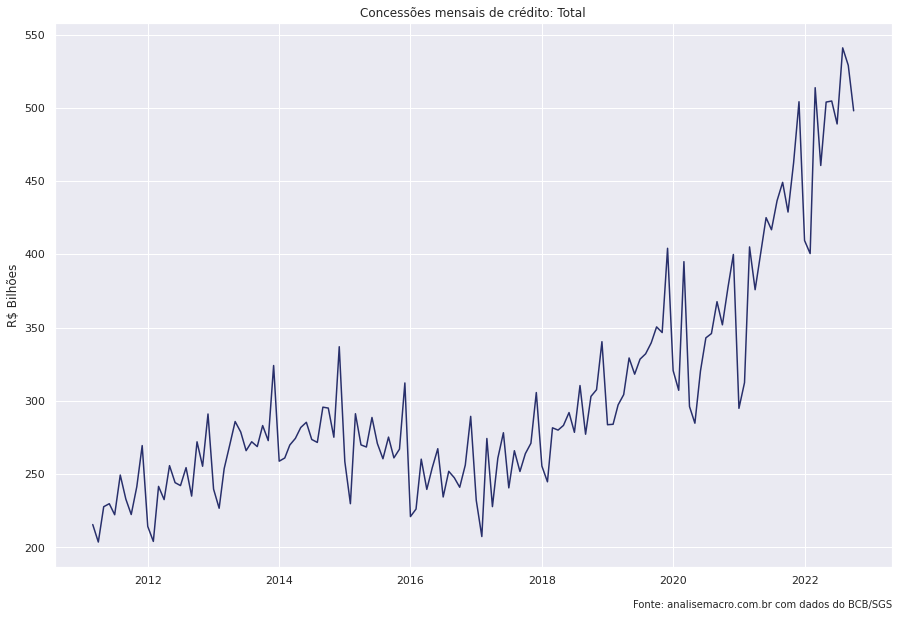

In [ ]:
# Plota o crédito total
sns.lineplot(data = credito['total']).set(title = 'Concessões mensais de crédito: Total',
                                                xlabel = '',
                                                ylabel = 'R$ Bilhões')

# Adiciona a fonte no gráfico           
plt.annotate('',
            xy = (1.0, -0.07),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

##Concessões mensais de crédito: PJ x PF

[Text(0, 0.5, 'R$ Bilhões'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Concessões mensais de crédito: PF vs. PJ')]

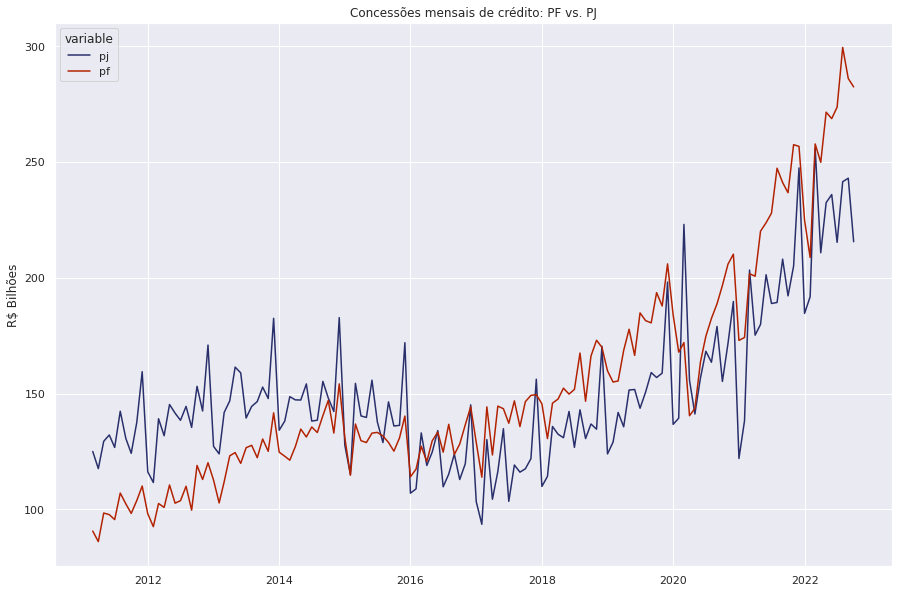

In [ ]:
# Plota as concessões de crédito para PJ e PF
(
    sns.lineplot(x = 'Date',
             y = 'values',
             hue = 'variable',
             data = credito_long[credito_long.variable.isin(['pj', 'pf'])])
    .set(title = 'Concessões mensais de crédito: PF vs. PJ',
     xlabel = '',
     ylabel = 'R$ Bilhões')
     )                

##Concessões mensais de crédito: Livre x Direcionado

[Text(0, 0.5, 'R$ Bilhões'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Concessões mensais de crédito: Livre vs. Direcionado')]

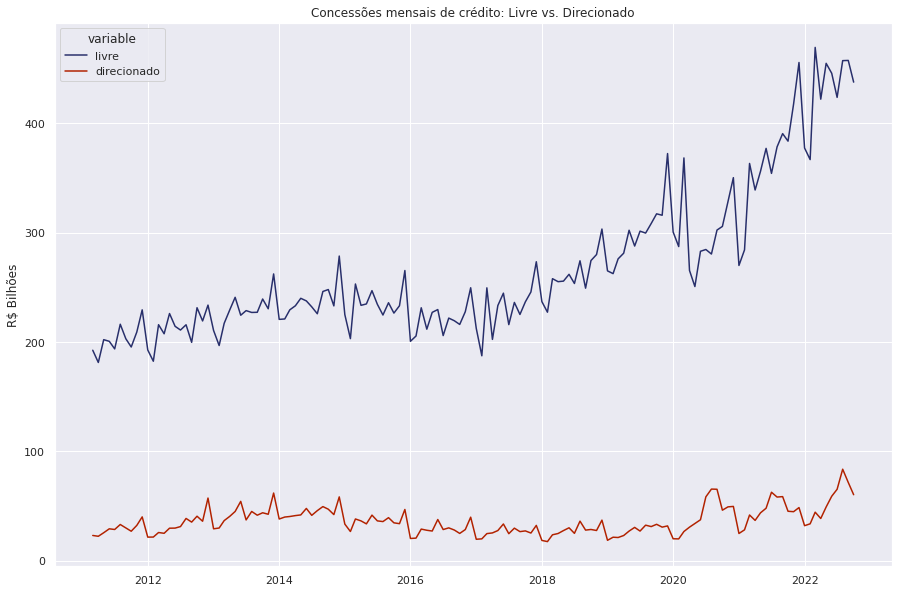

In [ ]:
 # Plota as concessões de crédito Livre e Direcionado
(
    sns.lineplot(x = 'Date',
             y = 'values',
             hue = 'variable',
             data = credito_long[credito_long.variable.isin(['livre', 'direcionado'])])
    .set(title = 'Concessões mensais de crédito: Livre vs. Direcionado',
         xlabel = '',
         ylabel = 'R$ Bilhões')
     )   

###Concessões mensais de crédito deflacionados

In [ ]:
# Busca a série do índice do IPCA e renomeia a coluna de valor
ipca = (
        ip.timeseries('PRECOS12_IPCA12')
        [['VALUE (-)']]
        .rename(columns = {'VALUE (-)' : 'ipca'})
        )

# Junta o data frame de crédito e ipca para ajustar na mesma data
credito_ipca = credito.join(ipca)

In [ ]:
# Pega o deflator base (o último índice da série do ipca)
deflator_base = credito_ipca['ipca'].iloc[-1]

# Calcula o deflator para deflacionar os valores de crédito
deflator = deflator_base / credito_ipca.loc[:,['ipca']]

# Multiplica os valores pelo deflator para obter os valores reais
credito_reais = credito.mul(deflator.ipca, axis = 'index')

In [ ]:
# Torna em formato long
credito_reais_long = pd.melt(credito_reais.reset_index(),
                     id_vars = 'Date',
                     value_vars = credito_reais.columns,
                     var_name = 'variable',
                     value_name = 'values')

Text(1.0, -0.13, 'Fonte: analisemacro.com.br com dados do BCB/SGS')

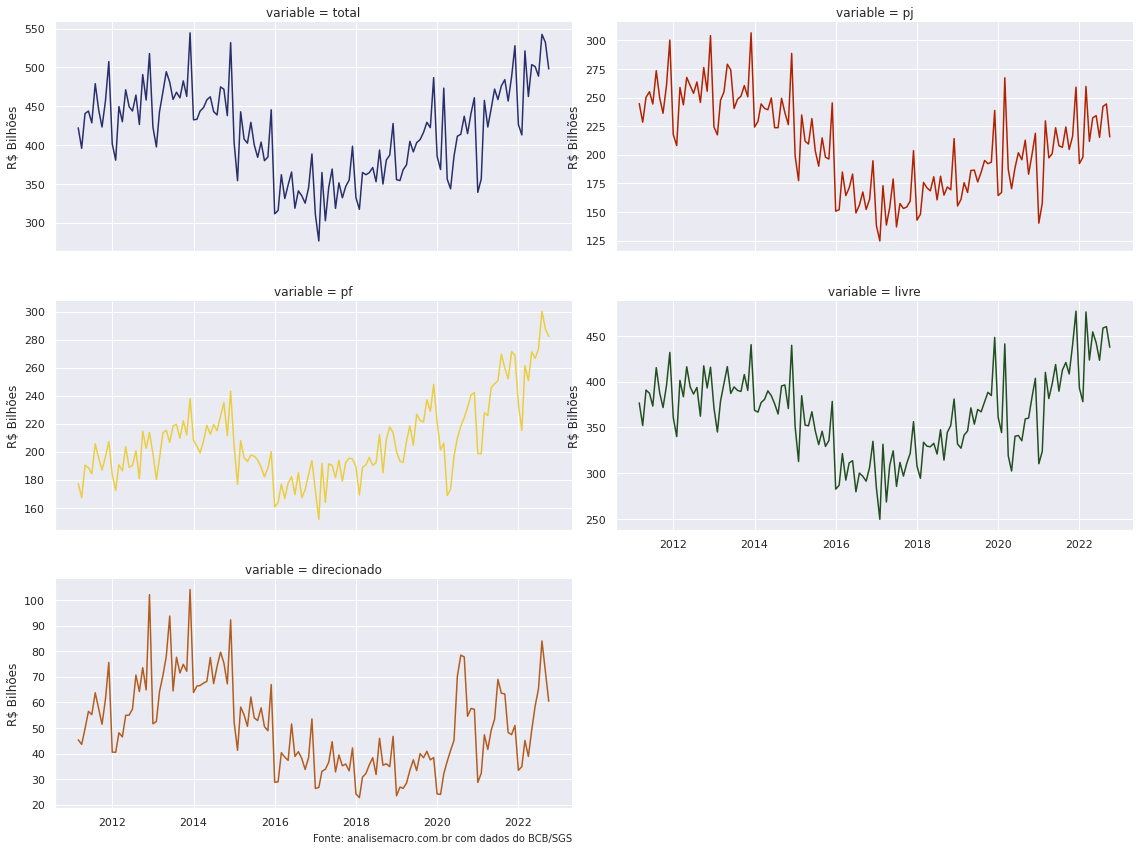

In [ ]:
# Plota todas as variações
g = sns.FacetGrid(credito_reais_long, col = 'variable',
                  col_wrap = 2,
                  legend_out = True,
                  hue = 'variable',
                  sharey = False,
                  height = 4,
                  aspect = 2)


g.map_dataframe(sns.lineplot, 
                x = 'Date',
                y = 'values').set(xlabel = "",
                                 ylabel = 'R$ Bilhões')

# Adiciona a fonte no gráfico           
plt.annotate('',
            xy = (1.0, -0.13),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

##Juros, Spread Bancário e Inadimplência

In [ ]:
# Busca as séries sobre juros, spread e inadimplência no SGS
juros = sgs.get({'juro' : 20714,
                 'spread' : 20783,
                 'inadimplencia' : 21082})

# Torna em formato long
juros_long = pd.melt(juros.reset_index(),
                     id_vars = 'Date',
                     value_vars = juros.columns,
                     var_name = 'variable',
                     value_name = 'values')

In [ ]:
# Plota todas as variações
g = sns.FacetGrid(juros_long, col = 'variable',
                  col_wrap = 2,
                  hue = 'variable',
                  sharey = False,
                  height = 4,
                  aspect = 2)

NameError: ignored

Text(1.0, -0.13, 'Fonte: analisemacro.com.br com dados do BCB/SGS')

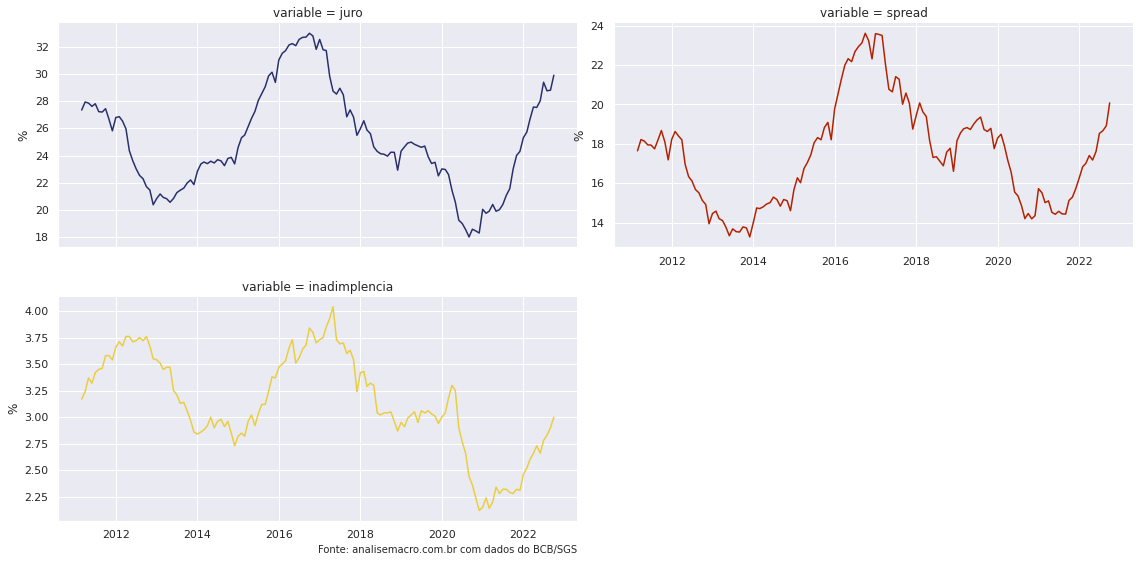

In [ ]:
# Plota todas as variações
g = sns.FacetGrid(juros_long, col = 'variable',
                  col_wrap = 2,
                  hue = 'variable',
                  sharey = False,
                  height = 4,
                  aspect = 2)


g.map_dataframe(sns.lineplot, 
                x = 'Date',
                y = 'values').set(xlabel = "",
                                 ylabel = '%')

# Adiciona a fonte no gráfico           
plt.annotate('',
            xy = (1.0, -0.13),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)